In [1]:
#import packages
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
ini_data = pd.ExcelFile('Data_update.xlsx')
#df = ini_data.parse('data')
fin_data = ini_data.parse('fin_data')
qual_data = ini_data.parse('qualitative data')
macro_data = ini_data.parse('macro_data')
ind_data = ini_data.parse('industrial_data')

In [3]:
fin_data.drop(['Number', 'Name', 'Year'], axis=1, inplace=True)
qual_data.drop(['Number', 'Name', 'Year','Субъект','Федеральный округ'], axis=1, inplace=True)
macro_data.drop(['Number', 'Name', 'Year'], axis=1, inplace=True)
ind_data.drop(['Number', 'Name', 'Year'], axis=1, inplace=True)

In [4]:
fin_data.head()

,Default,Cur_liq,Asset_liq,Capital_adequacy,Capital_stock_ratio,Solvency,Debt_ratio,Return_oper,ROA,ROE,Inv_port,Return_on_inv,Prem_life_ins,Prem_non-life_ins,Direct_sales,Reserves_life,Reserves_non-life,Market_rate,Return_insurance,Reinsurers_credit_quality,Loss_ratio,Max_payout
0,1,0.757025,0.711013,0.148484,0.530288,0.429779,0.011640,0.460239,0.025121,0.075739,0.535467,0.121920,0.0,0.159431,0.349989,0,1416109.0,0.001768,0.033269,0.5000,1.017234,0.027057
1,1,0.972931,0.744634,0.173071,0.488499,0.538663,0.002985,0.412531,0.021840,0.069435,0.545404,0.285004,0.0,0.031893,0.577751,0,1583519.0,0.001666,0.030923,0.5000,1.126993,0.025012
2,1,1.006764,0.777258,0.341899,1.001601,1.176975,0.002615,0.417858,0.040852,0.118517,0.706294,0.198888,0.0,0.162669,0.270044,0,1745282.0,0.001933,0.064628,0.5000,1.068161,0.017122
3,1,1.264968,0.817078,0.315830,1.121309,1.212020,0.002455,0.527153,0.031956,0.090889,0.603512,-0.010274,0.0,0.207545,0.391145,0,2086068.0,0.002041,0.050216,0.5000,0.902566,0.015619
4,1,1.142587,0.809090,0.217673,0.731265,1.379767,0.001900,0.496896,0.038611,0.133241,0.675639,0.031761,0.0,-0.060351,0.333863,0,3432628.0,0.002195,0.056880,0.7941,0.934122,0.014578


In [4]:
def norm(data, mod, reverse):
    
    for i in range (0, data.shape[1]):
        
        if (data[data.columns[i]].name in reverse) == False:
            
            if mod==True:
                low = data[data.columns[i]].quantile(0.05)
                high = data[data.columns[i]].quantile(0.95)
                
                for x in range (0, len(data)):
                    if data[data.columns[i]].iloc[x] >= high:
                        data[data.columns[i]].iloc[x] = 10
                    elif data[data.columns[i]].iloc[x] <=low:
                        data[data.columns[i]].iloc[x] = 0
                    else:
                        data[data.columns[i]].iloc[x] = ((data[data.columns[i]].iloc[x] - low)/(high-low))*10
                    x=+1
                    
            elif mod==False:
                
                low = data[data.columns[i]].min()
                high = data[data.columns[i]].max()
                
                for x in range (0, len(data)):
                    if data[data.columns[i]].iloc[x] >= high:
                        data[data.columns[i]].iloc[x] = 10
                    elif data[data.columns[i]].iloc[x] <=low:
                        data[data.columns[i]].iloc[x] = 0
                    else:
                        data[data.columns[i]].iloc[x] = ((data[data.columns[i]].iloc[x] - low)/(high-low))*10
                    x=+1
            
           
        elif (data[data.columns[i]].name in reverse) == True:
            
            if mod==True:
                low = data[data.columns[i]].quantile(0.95)
                high = data[data.columns[i]].quantile(0.05)
                
                for x in range (0, len(data)):
                    if data[data.columns[i]].iloc[x] <= high:
                        data[data.columns[i]].iloc[x] = 10
                    elif data[data.columns[i]].iloc[x] >=low:
                        data[data.columns[i]].iloc[x] = 0
                    else:
                        data[data.columns[i]].iloc[x] = ((data[data.columns[i]].iloc[x] - low)/(high-low))*10
                    x=+1
                
           
            elif mod==False:
                
                low = data[data.columns[i]].max()
                high = data[data.columns[i]].min()
                
                for x in range (0, len(data)):
                    if data[data.columns[i]].iloc[x] <= high:
                        data[data.columns[i]].iloc[x] = 10
                    elif data[data.columns[i]].iloc[x] >=low:
                        data[data.columns[i]].iloc[x] = 0
                    else:
                        data[data.columns[i]].iloc[x] = ((data[data.columns[i]].iloc[x] - low)/(high-low))*10
                    x=+1
                
        i=+1
        
    return data



In [13]:
fin_data.columns

Index(['Default', 'Cur_liq', 'Asset_liq', 'Capital_adequacy',
       'Capital_stock_ratio', 'Solvency', 'Debt_ratio', 'Return_oper', 'ROA',
       'ROE', 'Inv_port', 'Return_on_inv', 'Prem_life_ins',
       'Prem_non-life_ins', 'Direct_sales', 'Reserves_life',
       'Reserves_non-life', 'Market_rate', 'Return_insurance',
       'Reinsurers_credit_quality', 'Loss_ratio', 'Max_payout'],
      dtype='object')

In [5]:
Default = fin_data['Default']
print(len(Default),type(Default), Default.value_counts())

1042 <class 'pandas.core.series.Series'> 1    874
0    168
Name: Default, dtype: int64


In [7]:
cols = ['Asset_liq','Capital_stock_ratio', 'Solvency', 'Debt_ratio', 'ROA', 'ROE', 'Inv_port', 
           'Return_on_inv', 'Prem_non-life_ins', 'Direct_sales', 'Reserves_life','Reserves_non-life', 
           'Market_rate', 'Return_insurance','Reinsurers_credit_quality', 'Loss_ratio', 'Max_payout',
         
        'Life', 'Owner_struc', 'Owner_infl','Development_strategy', 'Governance', 'Risk_management',
       'Auditor_quality', 'Actuarial_valuation', 'Centre', 'East','Siberia' ,
       
       'Lowest_20', 'Life_expectancy', 'Mortality_rate','Revenue', 'Unemployment', 'GDP_pc_const',
        'Actives_gdp', 'ROE_average', 'Prem_gdp', 'Numb_contr','Pay',
       'Pay_gdp', 'Prem', 'Prem_pop', 'Pay_pop', 'Pay_prem']

In [6]:
norm(fin_data, mod=True, reverse = ['Debt_ratio','Loss_ratio','Max_payout'])

,Default,Cur_liq,Asset_liq,Capital_adequacy,Capital_stock_ratio,Solvency,Debt_ratio,Return_oper,ROA,ROE,Inv_port,Return_on_inv,Prem_life_ins,Prem_non-life_ins,Direct_sales,Reserves_life,Reserves_non-life,Market_rate,Return_insurance,Reinsurers_credit_quality,Loss_ratio,Max_payout
0,10,1.038955,5.395511,0.966268,0.698138,0.822026,9.613153,3.055454,4.572577,4.259781,4.202826,8.258074,1.324742,3.443128,3.641012,0.000000,0.565141,0.414038,2.926244,5.000000,4.086049,9.275028
1,10,1.465761,6.064944,1.019575,0.650479,1.030284,9.900787,2.661576,4.465659,4.204000,4.327324,10.000000,1.324742,2.893034,6.010471,0.000000,0.632016,0.388993,2.907728,5.000000,3.447933,9.329812
2,10,1.532643,6.714514,1.385608,1.235661,2.251166,9.913105,2.705556,5.085268,4.638331,6.342999,10.000000,1.324742,3.457095,2.809325,0.000000,0.696635,0.454709,3.173785,5.000000,3.789970,9.541214
3,10,2.043063,7.507364,1.329089,1.372185,2.318197,9.918399,3.607890,4.795360,4.393849,5.055320,1.181407,1.324742,3.650654,4.069173,0.000000,0.832768,0.481338,3.060023,5.000000,4.752701,9.581501
4,10,1.801138,7.348318,1.116276,0.927348,2.639040,9.936844,3.358091,5.012241,4.768626,5.958946,3.431652,1.324742,2.495168,3.473250,0.000000,1.370677,0.519202,3.112625,7.940999,4.569239,9.609379
5,10,1.451991,6.016955,0.873498,0.767861,2.834556,10.000000,3.544989,4.685575,4.619219,5.858381,5.405312,1.324742,3.823159,2.779399,0.000000,1.705647,0.529067,2.998421,7.647252,4.227040,9.652307
6,10,1.319905,5.591467,0.840478,0.808765,2.928814,10.000000,4.453674,4.676258,4.638531,6.513938,4.220875,1.324742,2.530307,1.267210,0.000000,1.745478,0.510407,2.998985,8.000000,4.373267,9.691216
7,10,4.456455,10.000000,3.544668,1.626067,3.059159,10.000000,2.437068,5.906779,4.616279,3.757990,2.282453,1.324742,3.298635,4.140984,0.000000,0.120981,0.127176,4.846014,0.000000,7.152154,0.000000
8,10,3.978027,10.000000,3.118220,1.657918,3.571324,10.000000,0.302911,4.764352,4.086978,3.758102,2.438358,1.324742,3.921908,5.492844,0.000000,0.152746,0.122996,3.120737,0.000000,4.659176,0.000000
9,10,1.827359,8.635516,4.389798,2.281864,3.937999,10.000000,0.272498,7.026525,5.126320,5.516781,8.740724,1.324742,2.956198,10.000000,0.000000,0.125862,0.117903,4.182840,0.000000,3.841279,0.000000


In [16]:
macro_data.columns

Index(['Default', 'Lowest_20', 'Life_expectancy', 'Mortality_rate',
       'GDP_growth', 'Inflation', 'Revenue', 'Unemployment', 'Interest_rate',
       'Exchange_rate', 'GDP_pc_const'],
      dtype='object')

In [8]:
norm(macro_data,mod=False,reverse=['Mortality_rate','Inflation','Unemployment'])

,Default,Lowest_20,Life_expectancy,Mortality_rate,GDP_growth,Inflation,Revenue,Unemployment,Interest_rate,Exchange_rate,GDP_pc_const
0,10,0.000000,0.000000,0.000000,8.268130,7.002450,7.326115,1.134022,5.175479,10.000000,5.731343
1,10,2.222222,0.793241,1.621622,6.007887,4.375350,9.292903,4.226806,4.705903,6.657258,3.862930
2,10,5.555556,2.908942,3.513514,0.000000,4.666320,0.656258,0.000000,8.617371,0.112028,0.000000
3,10,6.666667,5.159587,5.405405,4.804580,10.000000,0.000000,0.103095,10.000000,0.000000,0.017732
4,10,6.666667,8.915747,7.027027,8.424189,6.966522,0.696668,3.711341,6.052610,4.397496,2.975623
5,10,7.777778,10.000000,8.648649,10.000000,0.000000,9.817326,7.422681,0.000000,1.907639,7.453994
6,10,10.000000,8.635028,10.000000,7.350981,8.862011,10.000000,10.000000,5.915513,2.668670,10.000000
7,10,0.000000,0.000000,0.000000,8.268130,7.002450,7.326115,1.134022,5.175479,10.000000,5.731343
8,10,2.222222,0.793241,1.621622,6.007887,4.375350,9.292903,4.226806,4.705903,6.657258,3.862930
9,10,5.555556,2.908942,3.513514,0.000000,4.666320,0.656258,0.000000,8.617371,0.112028,0.000000


In [18]:
macro_data.describe()

,Default,Lowest_20,Life_expectancy,Mortality_rate,GDP_growth,Inflation,Revenue,Unemployment,Interest_rate,Exchange_rate,GDP_pc_const
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,8.387716,5.382811,5.007761,4.970172,6.325980,5.985618,5.240430,3.576984,5.856318,3.745265,4.099739
std,3.679181,3.120507,3.780534,3.358668,3.077237,3.028679,4.350452,3.419114,2.929088,3.448241,3.367061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2.222222,0.793241,1.621622,4.804580,4.375350,0.656258,0.103095,4.705903,0.112028,0.017732
50%,10.000000,6.666667,5.159587,5.405405,7.350981,6.966522,7.326115,3.711341,5.915513,2.668670,3.862930
75%,10.000000,7.777778,8.915747,8.648649,8.424189,8.862011,9.817326,7.422681,8.617371,6.657258,7.453994
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [19]:
ind_data.columns

Index(['Default', 'Actives_gdp', 'ROE_average', 'Prem_gdp', 'Numb_contr', 'TA',
       'Pay', 'Pay_gdp', 'Prem', 'Prem_pop', 'Pay_pop', 'Pay_prem'],
      dtype='object')

In [9]:
norm(ind_data,mod=False,reverse=[])

,Default,Actives_gdp,ROE_average,Prem_gdp,Numb_contr,TA,Pay,Pay_gdp,Prem,Prem_pop,Pay_pop,Pay_prem
0,10,0.094340,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,7.786192
1,10,0.000000,2.433628,0.689655,2.638484,1.142430,2.772538,7.668335,1.412911,1.351351,2.800076,8.766796
2,10,0.188679,7.654867,4.482759,0.758017,1.534954,4.732583,9.185071,2.075104,1.621622,4.262533,10.000000
3,10,1.792453,6.061947,7.931034,4.169096,2.748298,4.411575,6.076392,4.742575,4.594595,4.157203,5.213750
4,10,6.132075,5.044248,8.620690,7.857143,5.515087,4.623230,3.531956,6.466217,6.216216,4.136561,3.147791
5,10,7.830189,9.203540,10.000000,9.241983,7.939417,5.309328,0.000000,9.987906,10.000000,4.975756,0.000000
6,10,10.000000,10.000000,7.241379,10.000000,10.000000,10.000000,3.800200,10.000000,10.000000,10.000000,4.066539
7,10,0.094340,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,7.786192
8,10,0.000000,2.433628,0.689655,2.638484,1.142430,2.772538,7.668335,1.412911,1.351351,2.800076,8.766796
9,10,0.188679,7.654867,4.482759,0.758017,1.534954,4.732583,9.185071,2.075104,1.621622,4.262533,10.000000


In [21]:
qual_data.columns

Index(['Default', 'Type', 'Life', 'Owner_struc', 'Owner_infl',
       'Development_strategy', 'Governance', 'Risk_management',
       'Auditor_quality', 'Actuarial_valuation', 'Age', 'Субъект',
       'Федеральный округ', 'Centre', 'Volga', 'Ural', 'East', 'North-West',
       'Siberia'],
      dtype='object')

In [10]:
region=qual_data[['Life','Centre', 'Volga', 'Ural', 'East', 'North-West','Siberia']]
region.head()

,Life,Centre,Volga,Ural,East,North-West,Siberia
0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0
2,1,1,0,0,0,0,0
3,1,1,0,0,0,0,0
4,1,1,0,0,0,0,0


In [11]:
norm(region,mod=False,reverse=[])

,Life,Centre,Volga,Ural,East,North-West,Siberia
0,10,10,0,0,0,0,0
1,10,10,0,0,0,0,0
2,10,10,0,0,0,0,0
3,10,10,0,0,0,0,0
4,10,10,0,0,0,0,0
5,10,10,0,0,0,0,0
6,10,10,0,0,0,0,0
7,10,10,0,0,0,0,0
8,10,10,0,0,0,0,0
9,10,10,0,0,0,0,0


In [12]:
qual_data = qual_data.drop(['Life','Centre', 'Volga', 'Ural', 'East', 'North-West','Siberia'], axis = 1)
qual_data

,Default,Type,Owner_struc,Owner_infl,Development_strategy,Governance,Risk_management,Auditor_quality,Actuarial_valuation,Age
0,1,1,2.5,10.0,5.0,5.0,5.0,7.5,0.0,14
1,1,1,2.5,10.0,5.0,5.0,5.0,7.5,0.0,15
2,1,1,2.5,10.0,7.5,5.0,5.0,7.5,10.0,16
3,1,1,2.5,10.0,7.5,5.0,5.0,7.5,10.0,17
4,1,1,2.5,10.0,7.5,5.0,5.0,5.0,10.0,18
5,1,1,2.5,10.0,7.5,5.0,5.0,5.0,10.0,19
6,1,1,2.5,10.0,7.5,5.0,5.0,5.0,10.0,20
7,1,1,2.5,7.5,2.5,5.0,2.5,0.0,0.0,19
8,1,1,2.5,7.5,2.5,5.0,2.5,0.0,10.0,20
9,1,1,2.5,7.5,2.5,5.0,2.5,0.0,10.0,21


In [13]:
join_data = pd.concat([fin_data, qual_data, macro_data, ind_data, region], sort = False, axis = 1)
join_data.head()

,Default,Cur_liq,Asset_liq,Capital_adequacy,Capital_stock_ratio,Solvency,Debt_ratio,Return_oper,ROA,ROE,Inv_port,Return_on_inv,Prem_life_ins,Prem_non-life_ins,Direct_sales,Reserves_life,Reserves_non-life,Market_rate,Return_insurance,Reinsurers_credit_quality,Loss_ratio,Max_payout,Default,Type,Owner_struc,Owner_infl,Development_strategy,Governance,Risk_management,Auditor_quality,Actuarial_valuation,Age,Default,Lowest_20,Life_expectancy,Mortality_rate,GDP_growth,Inflation,Revenue,Unemployment,Interest_rate,Exchange_rate,GDP_pc_const,Default,Actives_gdp,ROE_average,Prem_gdp,Numb_contr,TA,Pay,Pay_gdp,Prem,Prem_pop,Pay_pop,Pay_prem,Life,Centre,Volga,Ural,East,North-West,Siberia
0,10,1.038955,5.395511,0.966268,0.698138,0.822026,9.613153,3.055454,4.572577,4.259781,4.202826,8.258074,1.324742,3.443128,3.641012,0.0,0.565141,0.414038,2.926244,5.000000,4.086049,9.275028,1,1,2.5,10.0,5.0,5.0,5.0,7.5,0.0,14,10,0.000000,0.000000,0.000000,8.268130,7.002450,7.326115,1.134022,5.175479,10.000000,5.731343,10,0.094340,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,7.786192,10,10,0,0,0,0,0
1,10,1.465761,6.064944,1.019575,0.650479,1.030284,9.900787,2.661576,4.465659,4.204000,4.327324,10.000000,1.324742,2.893034,6.010471,0.0,0.632016,0.388993,2.907728,5.000000,3.447933,9.329812,1,1,2.5,10.0,5.0,5.0,5.0,7.5,0.0,15,10,2.222222,0.793241,1.621622,6.007887,4.375350,9.292903,4.226806,4.705903,6.657258,3.862930,10,0.000000,2.433628,0.689655,2.638484,1.142430,2.772538,7.668335,1.412911,1.351351,2.800076,8.766796,10,10,0,0,0,0,0
2,10,1.532643,6.714514,1.385608,1.235661,2.251166,9.913105,2.705556,5.085268,4.638331,6.342999,10.000000,1.324742,3.457095,2.809325,0.0,0.696635,0.454709,3.173785,5.000000,3.789970,9.541214,1,1,2.5,10.0,7.5,5.0,5.0,7.5,10.0,16,10,5.555556,2.908942,3.513514,0.000000,4.666320,0.656258,0.000000,8.617371,0.112028,0.000000,10,0.188679,7.654867,4.482759,0.758017,1.534954,4.732583,9.185071,2.075104,1.621622,4.262533,10.000000,10,10,0,0,0,0,0
3,10,2.043063,7.507364,1.329089,1.372185,2.318197,9.918399,3.607890,4.795360,4.393849,5.055320,1.181407,1.324742,3.650654,4.069173,0.0,0.832768,0.481338,3.060023,5.000000,4.752701,9.581501,1,1,2.5,10.0,7.5,5.0,5.0,7.5,10.0,17,10,6.666667,5.159587,5.405405,4.804580,10.000000,0.000000,0.103095,10.000000,0.000000,0.017732,10,1.792453,6.061947,7.931034,4.169096,2.748298,4.411575,6.076392,4.742575,4.594595,4.157203,5.213750,10,10,0,0,0,0,0
4,10,1.801138,7.348318,1.116276,0.927348,2.639040,9.936844,3.358091,5.012241,4.768626,5.958946,3.431652,1.324742,2.495168,3.473250,0.0,1.370677,0.519202,3.112625,7.940999,4.569239,9.609379,1,1,2.5,10.0,7.5,5.0,5.0,5.0,10.0,18,10,6.666667,8.915747,7.027027,8.424189,6.966522,0.696668,3.711341,6.052610,4.397496,2.975623,10,6.132075,5.044248,8.620690,7.857143,5.515087,4.623230,3.531956,6.466217,6.216216,4.136561,3.147791,10,10,0,0,0,0,0


In [14]:
X=join_data[cols]
y=Default

In [29]:
X.head()

,Asset_liq,Capital_stock_ratio,Solvency,Debt_ratio,ROA,ROE,Inv_port,Return_on_inv,Prem_non-life_ins,Direct_sales,Reserves_life,Reserves_non-life,Market_rate,Return_insurance,Reinsurers_credit_quality,Loss_ratio,Max_payout,Life,Owner_struc,Owner_infl,Development_strategy,Governance,Risk_management,Auditor_quality,Actuarial_valuation,Centre,East,Siberia,Lowest_20,Life_expectancy,Mortality_rate,Revenue,Unemployment,GDP_pc_const,Actives_gdp,ROE_average,Prem_gdp,Numb_contr,Pay,Pay_gdp,Prem,Prem_pop,Pay_pop,Pay_prem
0,5.395511,0.698138,0.822026,9.613153,4.572577,4.259781,4.202826,8.258074,3.443128,3.641012,0.0,0.565141,0.414038,2.926244,5.000000,4.086049,9.275028,10,2.5,10.0,5.0,5.0,5.0,7.5,0.0,10,0,0,0.000000,0.000000,0.000000,7.326115,1.134022,5.731343,0.094340,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,7.786192
1,6.064944,0.650479,1.030284,9.900787,4.465659,4.204000,4.327324,10.000000,2.893034,6.010471,0.0,0.632016,0.388993,2.907728,5.000000,3.447933,9.329812,10,2.5,10.0,5.0,5.0,5.0,7.5,0.0,10,0,0,2.222222,0.793241,1.621622,9.292903,4.226806,3.862930,0.000000,2.433628,0.689655,2.638484,2.772538,7.668335,1.412911,1.351351,2.800076,8.766796
2,6.714514,1.235661,2.251166,9.913105,5.085268,4.638331,6.342999,10.000000,3.457095,2.809325,0.0,0.696635,0.454709,3.173785,5.000000,3.789970,9.541214,10,2.5,10.0,7.5,5.0,5.0,7.5,10.0,10,0,0,5.555556,2.908942,3.513514,0.656258,0.000000,0.000000,0.188679,7.654867,4.482759,0.758017,4.732583,9.185071,2.075104,1.621622,4.262533,10.000000
3,7.507364,1.372185,2.318197,9.918399,4.795360,4.393849,5.055320,1.181407,3.650654,4.069173,0.0,0.832768,0.481338,3.060023,5.000000,4.752701,9.581501,10,2.5,10.0,7.5,5.0,5.0,7.5,10.0,10,0,0,6.666667,5.159587,5.405405,0.000000,0.103095,0.017732,1.792453,6.061947,7.931034,4.169096,4.411575,6.076392,4.742575,4.594595,4.157203,5.213750
4,7.348318,0.927348,2.639040,9.936844,5.012241,4.768626,5.958946,3.431652,2.495168,3.473250,0.0,1.370677,0.519202,3.112625,7.940999,4.569239,9.609379,10,2.5,10.0,7.5,5.0,5.0,5.0,10.0,10,0,0,6.666667,8.915747,7.027027,0.696668,3.711341,2.975623,6.132075,5.044248,8.620690,7.857143,4.623230,3.531956,6.466217,6.216216,4.136561,3.147791


In [30]:
y.head()

0    10
1    10
2    10
3    10
4    10
Name: Default, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##  Случайный лес

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [42]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), cols[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.0726, 'Development_strategy'],
 [0.0696, 'ROE'],
 [0.0696, 'Max_payout'],
 [0.0551, 'ROA'],
 [0.053, 'Return_insurance'],
 [0.0519, 'Owner_struc'],
 [0.0495, 'Inv_port'],
 [0.0437, 'Market_rate'],
 [0.0417, 'Risk_management'],
 [0.0416, 'Capital_stock_ratio'],
 [0.04, 'Asset_liq'],
 [0.0372, 'Prem_non-life_ins'],
 [0.0347, 'Debt_ratio'],
 [0.0341, 'Reinsurers_credit_quality'],
 [0.0321, 'Loss_ratio'],
 [0.0306, 'Solvency'],
 [0.0285, 'Reserves_non-life'],
 [0.0273, 'Direct_sales'],
 [0.0265, 'Return_on_inv'],
 [0.0252, 'Owner_infl'],
 [0.0153, 'Auditor_quality'],
 [0.0119, 'Actuarial_valuation'],
 [0.0117, 'Governance'],
 [0.0115, 'East'],
 [0.0074, 'GDP_pc_const'],
 [0.0073, 'Revenue'],
 [0.0066, 'Life'],
 [0.0059, 'Reserves_life'],
 [0.0054, 'Siberia'],
 [0.0045, 'Actives_gdp'],
 [0.0044, 'Unemployment'],
 [0.0042, 'Pay_prem'],
 [0.004, 'Pay'],
 [0.0039, 'Prem'],
 [0.0035, 'Prem_gdp'],
 [0.0034, 'Pay_pop'],
 [0.0034, 'Pay_gdp'],
 [0.0034, 'Numb_contr'],
 [0.0034, 'Lowest_20'],
 [

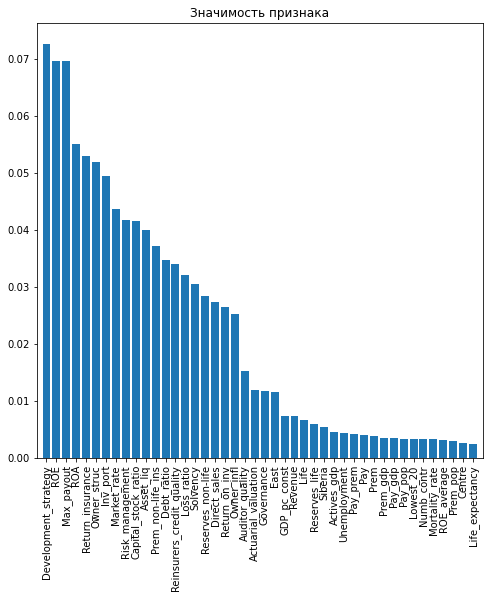

In [44]:
import matplotlib.pyplot as plt
#удобнее отобразить на столбчатой диаграмме
d_first = len(cols)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(cols)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [109]:
from sklearn import metrics

In [48]:
from sklearn import metrics
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9041533546325878


In [90]:
# матрица количества правильно и ошибочно угаданных классов 
# Верно спрогнозированные: 255 недеф и 28 деф
# Неверно спрогнозированные: 22 недеф (на самом деле дефолты) и 8 дефолтов (в реальности недефолты)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[ 25,  25],
       [ 10, 253]])

In [89]:
from sklearn.metrics import roc_auc_score
from scipy import stats

In [51]:
roc_auc_score(model.predict(X_test), y_test)

0.8491776975531488

In [87]:
def Gini(y_true, y_pred):
    # check and get number of samples
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]
    
    # sort rows on prediction column 
    # (from largest to smallest)
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:,0].argsort()][::-1,0]
    pred_order = arr[arr[:,1].argsort()][::-1,0]
    
    # get Lorenz curves
    L_true = np.cumsum(true_order) / np.sum(true_order)
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    L_ones = np.linspace(1/n_samples, 1, n_samples)
    
    # get Gini coefficients (area between curves)
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)
    
    # normalize to true Gini coefficient
    return G_pred/G_true

In [55]:
Gini(y_test, model.predict(X_test))

0.52

##  Дерево решений

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model_tree = DecisionTreeClassifier(random_state=100,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='entropy',
                               # максимальная глубина дерева (количество слоев)
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False
                              )

# Обучаем модель
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, presort=False, random_state=100)

In [69]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [14]:
X_train.head()

,Asset_liq,Capital_stock_ratio,Solvency,Debt_ratio,Return_on_inv,Prem_non-life_ins,Direct_sales,Reserves_life,Return_insurance,Reinsurers_credit_quality,Loss_ratio,Max_payout,Life,Owner_infl,Governance,Auditor_quality,Actuarial_valuation,Centre,East,Interest_rate,GDP_pc_cur,Pay_pop,Pay_prem,Inv_port,Owner_struc,Poverty_headcount,Lowest_20,Mortality_rate,Revenue,Unemployment,Actives_gdp,Numb_contr,Pay_gdp,Prem_pop
940,1.660535,8.364197,3.416315,0.000000,0.000000,3.358643,2.693201,0.000000,5.197178,5.958405,1.732081,5.415722,0,0.0,5.0,5.0,10.0,1,0,5.164598,5.552051,4.957864,3.021211,4.675970,2.5,6.470401,6.014248,3.48392,2.380454,4.917678,6.738566,7.077634,3.179362,6.074733
258,0.000000,5.208329,3.620726,0.000000,6.234966,1.726979,2.947502,0.000000,4.588830,0.000000,5.893207,0.000000,0,7.5,5.0,5.0,10.0,1,0,5.047248,10.000000,10.000000,3.731424,6.305525,10.0,10.000000,10.000000,0.00000,10.000000,0.000000,10.000000,10.000000,3.385217,10.000000
564,2.236544,6.268804,5.551479,7.759941,6.210454,5.414866,5.802393,4.302311,5.801275,0.000000,7.881999,0.000000,1,2.5,5.0,2.5,10.0,0,1,5.164598,5.552051,4.957864,3.021211,0.000000,2.5,6.470401,6.014248,3.48392,2.380454,4.917678,6.738566,7.077634,3.179362,6.074733
399,0.000000,4.997141,0.000000,0.000000,1.016648,9.195960,0.000000,0.000000,3.695771,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,1,0,4.413809,0.000000,0.000000,6.606801,0.000000,0.0,0.000000,0.000000,10.00000,6.188945,6.793422,2.767402,0.000000,10.000000,0.000000
809,5.894543,5.394542,2.863267,0.000000,6.459612,4.716805,6.139768,0.000000,4.191076,7.639193,5.992874,4.476540,0,2.5,7.5,10.0,10.0,0,0,5.164598,5.552051,4.957864,3.021211,2.080118,10.0,6.470401,6.014248,3.48392,2.380454,4.917678,6.738566,7.077634,3.179362,6.074733


In [15]:
X_test.head()

,Asset_liq,Capital_stock_ratio,Solvency,Debt_ratio,Return_on_inv,Prem_non-life_ins,Direct_sales,Reserves_life,Return_insurance,Reinsurers_credit_quality,Loss_ratio,Max_payout,Life,Owner_infl,Governance,Auditor_quality,Actuarial_valuation,Centre,East,Interest_rate,GDP_pc_cur,Pay_pop,Pay_prem,Inv_port,Owner_struc,Poverty_headcount,Lowest_20,Mortality_rate,Revenue,Unemployment,Actives_gdp,Numb_contr,Pay_gdp,Prem_pop
270,4.908223,7.769696,3.916996,10.0,3.619506,2.289576,6.320850,0.0,7.403914,7.934884,4.309969,3.785808,0,7.5,7.5,10.0,10.0,1,0,5.164598,5.552051,4.957864,3.021211,10.000000,10.0,6.470401,6.014248,3.483920,2.380454,4.917678,6.738566,7.077634,3.179362,6.074733
725,5.747850,6.247855,6.511359,0.0,3.615616,1.728301,0.000000,0.0,4.859320,10.000000,5.891653,3.637981,0,10.0,7.5,10.0,10.0,1,0,5.164598,5.552051,4.957864,3.021211,10.000000,10.0,6.470401,6.014248,3.483920,2.380454,4.917678,6.738566,7.077634,3.179362,6.074733
31,5.531703,5.737992,6.229964,0.0,1.071274,0.000000,2.753148,0.0,10.000000,7.231601,6.042233,4.662747,0,10.0,5.0,10.0,5.0,1,0,10.000000,4.260199,4.977032,4.618245,6.687864,10.0,6.706974,6.014248,4.688097,0.000000,7.543718,3.884291,4.615463,5.132003,4.991680
342,6.403172,3.294749,2.724058,0.0,0.000000,6.771393,4.969097,0.0,0.000000,2.621397,8.208468,10.000000,0,2.5,5.0,0.0,0.0,1,0,5.047248,10.000000,10.000000,3.731424,7.305097,2.5,10.000000,10.000000,0.000000,10.000000,0.000000,10.000000,10.000000,3.385217,10.000000
604,7.306581,6.097525,3.326602,0.0,5.257854,1.749732,3.061341,10.0,3.300883,10.000000,0.000000,5.619598,1,10.0,7.5,10.0,10.0,1,0,7.359930,3.758766,5.074843,10.000000,7.889010,10.0,6.706974,5.126336,6.092969,2.357239,10.000000,2.829451,2.338198,7.517653,3.006083


In [63]:
y_train.head()

940    1
258    0
564    0
399    0
809    0
Name: Mod_default, dtype: int64

In [64]:
y_test.head()

270    0
725    0
31     0
342    0
604    0
Name: Mod_default, dtype: int64

In [77]:
roc_auc_score(model_tree.predict(X_test), y_test)

0.7380494505494505

In [78]:
Gini(model_tree.predict(X_test), y_test)

0.36666666666666664

In [80]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model_tree.predict(X_test)))

Accuracy: 0.8594249201277955


In [81]:
# матрица количества правильно и ошибочно угаданных классов 
# Верно спрогнозированные: 246 недеф и 23 деф
# Неверно спрогнозированные: 27 недеф (на самом деле дефолты) и 17 дефолтов (в реальности недефолты)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model_tree.predict(X_test))

array([[ 23,  27],
       [ 17, 246]])